<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')

# Data collection
dt = pd.read_csv('/content/delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [209]:
dt.shape # checking the dataframe shape

(21, 2)

In [210]:
dt.dtypes # data types

Delivery Time    float64
Sorting Time       int64
dtype: object

In [211]:
dt.isnull().sum()  # Cheacking for the missing values

Delivery Time    0
Sorting Time     0
dtype: int64

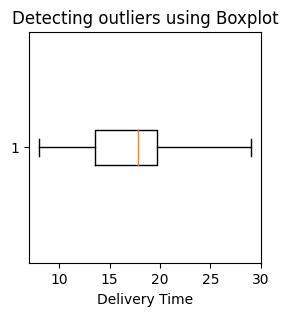

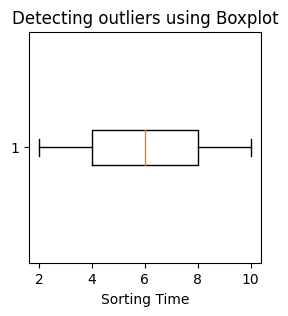

In [212]:
# Checking for any outliers

import matplotlib.pyplot as plt

for i in dict(dt.dtypes):
 if dict(dt.dtypes)[i] == 'int64' or dict(dt.dtypes)[i] ==  'float64':
  plt.figure(figsize =(3,3))
  plt.boxplot(dt[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

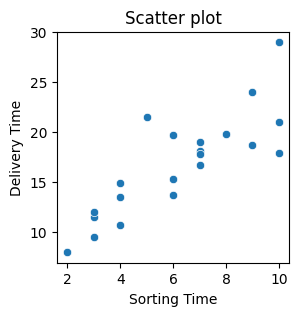

In [213]:
# Data Visualization

import seaborn as sns

plt.figure(figsize =(3,3))
sns.scatterplot(x = dt['Sorting Time'], y= dt['Delivery Time'], data = dt)
plt.title('Scatter plot')
plt.show()

In [214]:
# Data Summary

dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [215]:
# lets assign a variables to the columns

x = dt[['Sorting Time']]
y = dt[['Delivery Time']]

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y , test_size= 0.2)


In [216]:
x_train.shape

(16, 1)

In [217]:
x_test.shape # 20% of the sorting time column from the main dataframe

(5, 1)

In [218]:
from sklearn.linear_model import LinearRegression  # importing the linear regression model
reg= LinearRegression()   # Assigning the model to a variable reg
reg.fit(x_train,y_train) # training the model


LinearRegression()

In [219]:
# Now our model is ready to test

reg.predict([[4]]) # gave a random sorting time 4

array([[13.525]])

In [220]:
# Checking for the test variables

y_pred =reg.predict(x_test)
y_pred

array([[11.96636364],
       [18.20090909],
       [13.525     ],
       [13.525     ],
       [13.525     ]])

Text(0.5, 1.0, 'Sorting Time - Delivery Time Data')

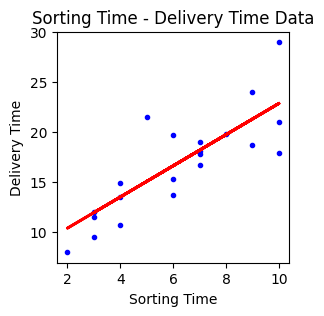

In [221]:
# Lets see the best fit line

plt.figure(figsize =(3,3))
plt.scatter(dt[['Sorting Time']], dt[['Delivery Time']], color = 'blue', marker = '.')
plt.plot(x_train, reg.predict(x_train), color = 'red',linewidth= 2)
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')
plt.title('Sorting Time - Delivery Time Data')

In [222]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_train,reg.predict(x_train))
print('Mean squared error',mse.round(3))

import numpy as np
print("Root mean squared error",np.sqrt(mse).round(3))

Mean squared error 9.307
Root mean squared error 3.051


In [223]:
# Feature transformation

from sklearn.preprocessing import FunctionTransformer
transform = FunctionTransformer(func=np.log1p)                 # Log transform
transformed_log = transform.fit_transform(x_train)

mse = mean_squared_error(y_train,reg.predict(transformed_log))
print('Mean squared error',mse.round(3))

import numpy as np
print("Root mean squared error",np.sqrt(mse).round(3))



Mean squared error 75.213
Root mean squared error 8.673


In [224]:
tranformed_square = np.square(x_train)                         # Square transform
mse = mean_squared_error(y_train,reg.predict(tranformed_square))
print('Mean squared error',mse.round(3))

import numpy as np
print("Root mean squared error",np.sqrt(mse).round(3))

Mean squared error 7044.351
Root mean squared error 83.931


In [225]:
tranformed_sqrt = np.sqrt(x_train)                            # Square root Tranform
mse = mean_squared_error(y_train,reg.predict(tranformed_sqrt))
print('Mean squared error',mse.round(3))

import numpy as np
print("Root mean squared error",np.sqrt(mse).round(3))

Mean squared error 61.56
Root mean squared error 7.846


Therefore, the mse and rmse for the square root transformation gives the best results

In [226]:
### Linear Regression for salary hike


ds = pd.read_csv('/content/Salary_Data.csv')
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [227]:
ds.shape # checking the dataframe shape

(30, 2)

In [228]:
ds.dtypes # data types

YearsExperience    float64
Salary             float64
dtype: object

In [229]:
ds.isnull().sum()  # Cheacking for the missing values

YearsExperience    0
Salary             0
dtype: int64

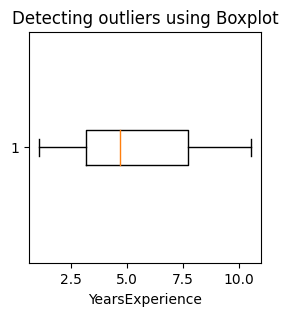

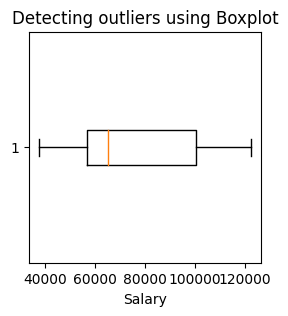

In [230]:
# Checking for any outliers

import matplotlib.pyplot as plt
for i in dict(ds.dtypes):
 if dict(ds.dtypes)[i] == 'int64' or dict(ds.dtypes)[i] ==  'float64':
  plt.figure(figsize =(3,3))
  plt.boxplot(ds[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

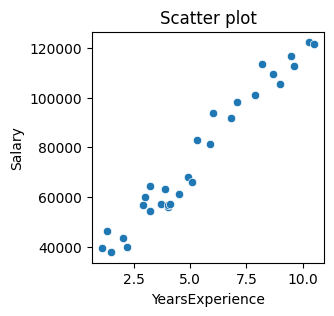

In [231]:
# Data Visualization

import seaborn as sns

plt.figure(figsize =(3,3))
sns.scatterplot(x = ds['YearsExperience'], y= ds['Salary'], data = ds)
plt.title('Scatter plot')
plt.show()

In [232]:
# Data Summary

ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [233]:
# lets assign a variables to the columns

xs = ds[['YearsExperience']]
ys = ds[['Salary']]

In [234]:
xs_train, xs_test, ys_train, ys_test = tts(xs,ys , test_size= 0.3)

In [235]:
xs_train.shape

(21, 1)

In [236]:
xs_test.shape

(9, 1)

In [237]:
from sklearn.linear_model import LinearRegression  # importing the linear regression model
reg2= LinearRegression()   # Assigning the model to a variable reg
reg2.fit(xs,ys) # training the model

LinearRegression()

In [238]:
# Now our model is ready to test

reg2.predict([[5]]) # gave a random sorting time 5

array([[73042.01180594]])

In [239]:
# Checking for the test variables

ys_pred =reg2.predict(xs)
ys_pred

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

Text(0.5, 1.0, 'Salary hike Data')

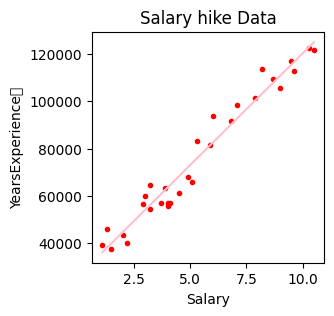

In [240]:
# Lets see the best fit line

plt.figure(figsize =(3,3))
plt.scatter(ds[['YearsExperience']], ds[['Salary']], color = 'red', marker = '.')
plt.plot(xs, reg2.predict(xs), color = 'pink')
plt.ylabel('YearsExperience	')
plt.xlabel('Salary')
plt.title('Salary hike Data')

In [241]:
from sklearn.metrics import mean_squared_error
mses = mean_squared_error(ys, reg2.predict(xs))
print('Mean squared error',mse.round(3))

print("Root mean squared error",np.sqrt(mses).round(3))

Mean squared error 61.56
Root mean squared error 5592.044


In [242]:
transform = FunctionTransformer(func=np.log1p)                      # log transform
transformed_log = transform.fit_transform(xs)
mses = mean_squared_error(ys, reg2.predict(transformed_log))
print('Mean squared error',mse.round(3))

print("Root mean squared error",np.sqrt(mses).round(3))


Mean squared error 61.56
Root mean squared error 40736.773


In [243]:
tranformed_square = np.square(xs)                         # Square transform
mse = mean_squared_error(ys,reg2.predict(tranformed_square))
print('Mean squared error',mse.round(3))

print("Root mean squared error",np.sqrt(mse).round(3))

Mean squared error 167255959612.619
Root mean squared error 408969.387


In [244]:
trans_squ = np.sqrt(xs)                           # Square root Tranform
MSE = mean_squared_error(ys,reg2.predict(trans_squ))
print('Mean squared error',MSE.round(3))
print("Root mean squared error",np.sqrt(MSE).round(3))

Mean squared error 1309012892.692
Root mean squared error 36180.283


Therefore, The RMSE value for the log transform gives the best results